In [1]:
#Import libraries
import numpy as np
import pandas as pd
import zipfile
import matplotlib as plt
import seaborn as sns

In [2]:
#unzip folder and create dict

with zipfile.ZipFile('Kickstarter+Projects.zip') as folder:
    dfs = {text_file.filename: pd.read_csv(folder.open(text_file.filename)) for text_file in folder.infolist() if text_file.filename.endswith('.csv')}

In [3]:
#get data from dict into dataframe

ks_data = pd.DataFrame.from_dict(dfs['kickstarter_projects.csv'])


# My Functions

In [62]:
#get portion of data
def df_head(dataframe):
    if not dataframe.head().empty:
        return dataframe.head()
    else:
        return "Your dataframe does not exist! Check your dataframe variable."

#get information
def df_info(dataframe):
    if not dataframe.empty:
        return dataframe.info() 
    else:
        return "There is an issue with your dataframe! Check your dataframe variable."

#get shape
def df_shape(dataframe):
    if dataframe.shape == (0,0):
        return "Your dataframe does not exist! Check your dataframe variable."
    else:
        return dataframe.shape

#decribe dataframe
def describe_df(dataframe):
    if not dataframe.empty:
        return dataframe.describe()
    else:
        return "Your dataframe does not exist! Check your dataframe variable."


#get columns
def get_columns(dataframe):
    list_length = len(dataframe.columns)
    if list_length >= 0:
        return dataframe.columns
    else:
        return "There are no columns in your dataframe! Check your dataframe variable."

#get column data
def column_data(dataframe, column_name: str):
    if column_name in get_columns(dataframe):
        return dataframe[column_name]
    else:
        return "Your dataframe or column does not exist! Check your dataframe variable and columns."

#check nulls
def check_nulls(dataframe):
    num_nulls = dataframe.isnull().sum()
    percent_nulls = num_nulls / len(dataframe) * 100
    if not dataframe.empty:
        if num_nulls.sum() > 0:
            return f"Here are the number of null values per column:\n {num_nulls}\nHere are the frequency of null values per column:\n {percent_nulls}"
        else:
            return "There are no nulls in your data."
    else:
        return "Your dataframe does not exist! Check your dataframe variable."

#check value counts
def unique(dataframe):
    if not dataframe.empty:
        return f"Here are the number of unique values per columns:", dataframe.nunique()


#check for dups
def check_dups(dataframe):
    num_dups = dataframe.duplicated().sum()
    if not dataframe.empty:
        return f"There are {num_dups} duplicates in your dataframe"
    else:
        return "Your dataframe does not exist! Check your dataframe variable."
    
#drop dups
def drop_dups(dataframe):
    dataframe = dataframe.drop_duplicates()
    if check_dups(dataframe) == 0:
        return dataframe
    else:
        return "There are still duplicates in your data. Please check your code."


#Visuals 

def make_hist(dataframe, columns, num_rows, num_columns, fig_size):
    if not dataframe.empty:
       fig, axs = plt.subplots(num_rows, num_columns, figsize=fig_size)
       for i in range(num_rows):
           for j in range(num_columns):
               axs[i,j].hist(dataframe[columns[i * num_columns + j]])
               axs[i,j].set_title(columns[i * num_columns + j + 1])
    else:
        return "Your dataframe is empty. Check your dataframe variable"

#make boxplots
def make_boxplot(dataframe, columns, num_rows, num_columns, fig_size):
    if not dataframe.empty:
       fig, axs = plt.subplots(num_rows, num_columns, figsize=fig_size)
       for i in range(num_rows):
           for j in range(num_columns):
               axs[i,j].boxplot(dataframe[columns[i * num_columns + j]])
               axs[i,j].set_title(columns[i * num_columns + j + 1])
    else:
        return "Your dataframe is empty. Check your dataframe variable"

#make pairplot
def make_pairplot(dataframe):
    return sns.pairplot(dataframe)

#make heatmap
def make_heatmap(dataframe):
    correlation = dataframe.corr
    return sns.heatmap(correlation)

#make scatter plot
def make_scatter(dataframe, x_column, y_column, title: str, x_label: str, y_label: str):
    plt.scatter(x=dataframe[x_column], y=dataframe[y_column])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return plt.show()

# EDA

In [5]:
#make copy of raw data
data_copy = ks_data.copy()

In [6]:
#check shape
df_shape(data_copy)

(374853, 11)

approx 375k rows adn 11 features; will have to downsize eventually

In [7]:
df_info(data_copy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


ID could be object, launched and deadline are objects and will need to be converted

In [9]:
df_head(data_copy)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [10]:
describe_df(data_copy)

,ID,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000


In [11]:
check_dups(data_copy)

'There are 0 duplicates in your dataframe'

In [14]:
check_nulls(data_copy)

'There are no nulls in your data.'

In [63]:
unique(data_copy)

('Here are the number of unique values per columns:',
 ID             374853
 Name           372061
 Category           15
 Subcategory       159
 Country            22
 Launched         3168
 Deadline         3164
 Goal            27692
 Pledged         39989
 Backers          3963
 State               5
 dtype: int64)

There are 15 categories, 159 sub categories, 22 countries, and 5 states

In [16]:
#change ID to string
data_copy['ID'] = data_copy['ID'].astype(str)

In [26]:
#change dates from strings and keep only year, month, day

data_copy['Launched'] = pd.to_datetime(data_copy['Launched']).dt.date

#change to datetime again
data_copy['Launched'] = pd.to_datetime(data_copy['Launched'])

data_copy['Deadline'] = pd.to_datetime(data_copy['Deadline'])



In [27]:
df_info(data_copy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           374853 non-null  object        
 1   Name         374853 non-null  object        
 2   Category     374853 non-null  object        
 3   Subcategory  374853 non-null  object        
 4   Country      374853 non-null  object        
 5   Launched     374853 non-null  datetime64[ns]
 6   Deadline     374853 non-null  datetime64[ns]
 7   Goal         374853 non-null  int64         
 8   Pledged      374853 non-null  int64         
 9   Backers      374853 non-null  int64         
 10  State        374853 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 31.5+ MB


In [28]:
df_head(data_copy)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27,2009-05-26,1900,387,10,Failed


In [65]:
#remove some columns now - ID, Name because irrelevent

data_copy = data_copy.drop(['ID', 'Name'], axis=1)

In [66]:
df_head(data_copy)

,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,Fashion,Fashion,United States,2009-04-21,2009-05-31,1000,625,30,Failed
1,Film & Video,Shorts,United States,2009-04-23,2009-07-20,80000,22,3,Failed
2,Art,Illustration,United States,2009-04-24,2009-05-03,20,35,3,Successful
3,Technology,Software,United States,2009-04-25,2009-07-14,99,145,25,Successful
4,Fashion,Fashion,United States,2009-04-27,2009-05-26,1900,387,10,Failed


In [81]:
#describe categorical data

data_copy.describe(include='O')

,Category,Subcategory,Country,State
count,374853,374853,374853,374853
unique,15,159,22,5
top,Film & Video,Product Design,United States,Failed
freq,62694,22310,292618,197611


Text(0, 0.5, 'Campaign Count')

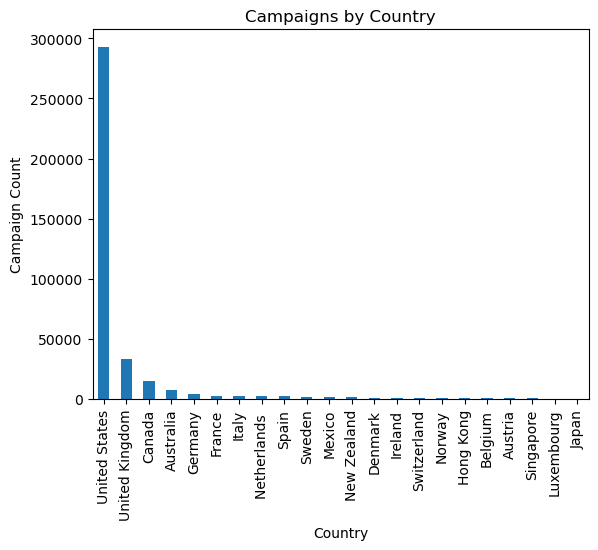

In [78]:
#count of campaigns by country

country_counts = data_copy['Country'].value_counts()
country_graph = country_counts.plot.bar()
country_graph.set_title('Campaigns by Country')
country_graph.set_xlabel('Country')
country_graph.set_ylabel('Campaign Count')

The US accounts for a lot of campaigns

Text(0, 0.5, 'Category Count')

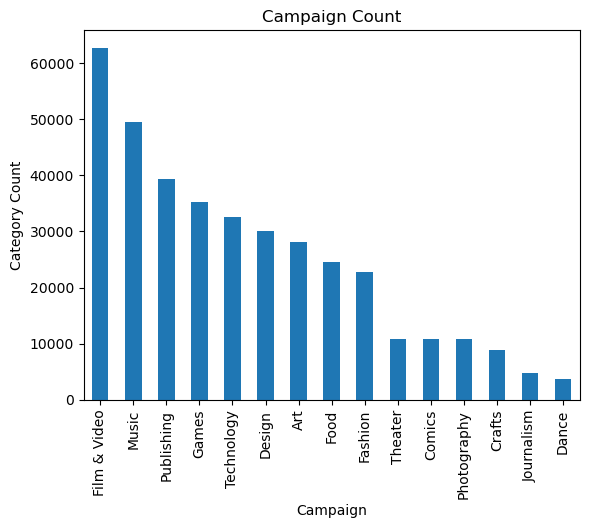

In [79]:
#count campaigns by categroy

campaigns = data_copy['Category'].value_counts()
campaigns_graph = campaigns.plot.bar()
campaigns_graph.set_title('Campaign Count')
campaigns_graph.set_xlabel('Campaign')
campaigns_graph.set_ylabel('Category Count')

Text(0, 0.5, 'State Count')

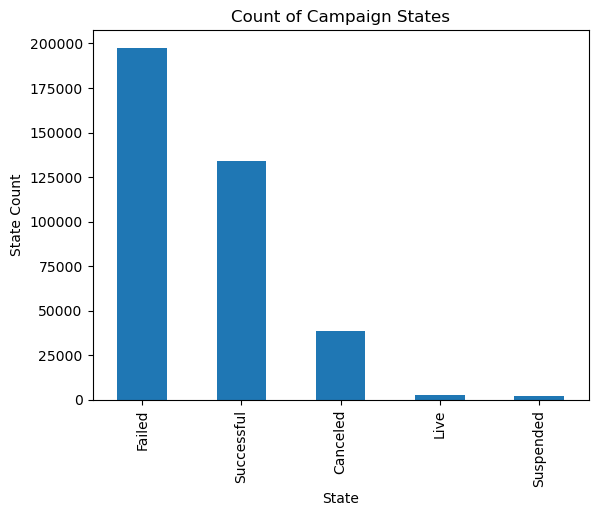

In [80]:
# count of campaign states

states = data_copy['State'].value_counts()
states_graph = states.plot.bar()
states_graph.set_title('Count of Campaign States')
states_graph.set_xlabel('State')
states_graph.set_ylabel('State Count')


,Category,Subcategory,Launched,Deadline,Goal,Pledged,Backers,State
Country,,,,,,,,
Australia,7839,7839,7839,7839,7839,7839,7839,7839
Austria,597,597,597,597,597,597,597,597
Belgium,617,617,617,617,617,617,617,617
Canada,14756,14756,14756,14756,14756,14756,14756,14756
Denmark,1113,1113,1113,1113,1113,1113,1113,1113
France,2939,2939,2939,2939,2939,2939,2939,2939
Germany,4171,4171,4171,4171,4171,4171,4171,4171
Hong Kong,618,618,618,618,618,618,618,618
Ireland,811,811,811,811,811,811,811,811
